# Linear Regression Practical Implementation

In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# we import some raw data 
from sklearn.datasets import fetch_california_housing

In [8]:
# Load data
df = fetch_california_housing()

In [11]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [15]:
# now  Create DataFrame
dataset=pd.DataFrame(df.data)



In [25]:
# Set the correct column names
dataset.columns = df.feature_names

In [27]:
# Show me the first 5 rows of the DataFrame dataset
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
# Independent Features x and Dependent Features y 
x = dataset
y = df.target

In [31]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [33]:
# Train-test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

In [35]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [104]:
#y_train.shape
print(dataset['MedInc'].min())
print(dataset['MedInc'].max())

0.4999
15.0001


In [112]:
print(dataset['HouseAge'].min())
print(dataset['HouseAge'].max())

print(dataset['Population'].min())
print(dataset['Population'].max())


1.0
52.0
3.0
35682.0


In [106]:
dataset.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [44]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)


In [130]:

X_train[0]

array([ 0.13350629,  0.50935748,  0.18106017, -0.27384968, -0.18411678,
       -0.01082519, -0.80568191,  0.78093406])

In [50]:
X_test = scaler.transform(X_test)

In [52]:
# Now use Linear Regression 
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [54]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [132]:
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [134]:
np.mean(mse)

-0.5268253746355749

In [60]:
# Prediction 
reg_pred = regression.predict(X_test)

In [62]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

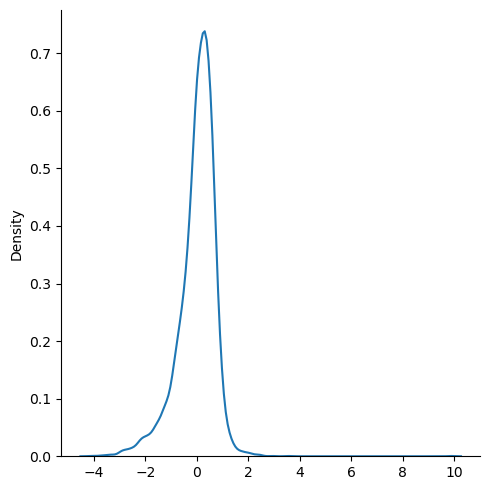

In [64]:
import seaborn as sns
sns.displot(reg_pred - y_test, kind ='kde')

In [66]:
from sklearn.metrics import r2_score

In [68]:
score = r2_score(reg_pred,y_test)

In [70]:
score


0.34513393809439663

Training data shape: (16512, 8)
Testing data shape: (4128, 8)
Mean Squared Error: 0.5558915986952442
R² Score: 0.575787706032451


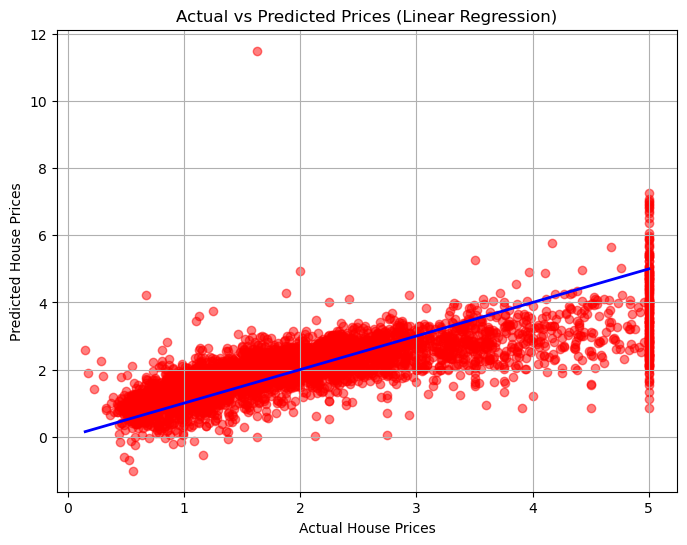

In [19]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = fetch_california_housing()
dataset = pd.DataFrame(df.data, columns=df.feature_names)

# Step 2: Define independent (x) and dependent (y) variables
x = dataset
y = df.target

# Step 3: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()   # Create scaler object
scaler.fit(x_train)          # Fit only on training data

x_train = scaler.transform(x_train)   # Transform training data
x_test = scaler.transform(x_test)     # Transform test data (use same scaler)

# Now x_train and x_test are scaled and ready for model training!
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 5: Create and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)   # Train the model

# Step 6: Predict on test data
y_pred = model.predict(x_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
r2 = r2_score(y_test, y_pred)               # R² Score (how good the model is)

print("Mean Squared Error:", mse)
print("R² Score:", r2)



# Step 8: Visualization – Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='r')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='b', linewidth=2)  # Perfect prediction line

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")

plt.grid(True)
plt.show()
